# Overfitting and Underfitting with Regularization and Hyperparameter Tuning

---

## Table of Contents

1. **Introduction**
2. **Overfitting and Underfitting: Concepts, Symptoms, and Visualizations**
3. **Regularization: L1 (Lasso) and L2 (Ridge)**
4. **Hyperparameter Tuning: Grid Search and Random Search**
5. **Evaluation Metrics and Model Validation**
6. **Visualization of Regularization Effects**
7. **Conclusion**


## 1. Introduction

Machine learning models often face challenges like **overfitting** and **underfitting**. These issues can be mitigated using techniques like **regularization** and **hyperparameter tuning**.

### Objectives:
- Understand overfitting and underfitting.
- Learn about L1 (Lasso) and L2 (Ridge) regularization.
- Perform hyperparameter tuning using Grid Search and Random Search.
- Evaluate and validate models using real-world data.


## 2. Overfitting and Underfitting: Concepts, Symptoms, and Visualizations

### 2.1 Overfitting
Occurs when a model learns noise along with the data patterns, resulting in:
- High training accuracy.
- Poor test performance.

**Example:** Polynomial regression with a high-degree polynomial.

### 2.2 Underfitting
Occurs when a model is too simple to capture patterns in data, resulting in:
- Poor training and test performance.

**Example:** Linear regression for a highly non-linear dataset.

---

### 2.3 Visualizations
We will use:
1. **Learning Curves** to study how training and test errors evolve with model complexity.
2. **Prediction Visualizations** to see how models of varying complexity perform on the data.


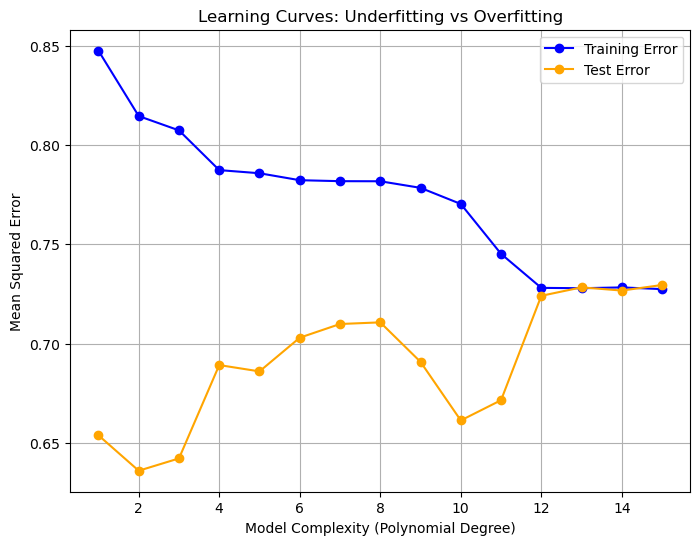

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate training and testing errors for different polynomial degrees
def learning_curve(max_degree):
    train_errors = []
    test_errors = []
    degrees = list(range(1, max_degree + 1))

    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, train_errors, label="Training Error", marker="o", color="blue")
    plt.plot(degrees, test_errors, label="Test Error", marker="o", color="orange")
    plt.xlabel("Model Complexity (Polynomial Degree)")
    plt.ylabel("Mean Squared Error")
    plt.title("Learning Curves: Underfitting vs Overfitting")
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate learning curves for degrees 1 to 15
learning_curve(max_degree=15)


## Learning Curves: Understanding Underfitting and Overfitting

### Purpose of the Script

This script generates **learning curves** to study how model complexity (polynomial degree) affects training and test errors. Learning curves help identify:
- **Underfitting**: When the model is too simple to capture patterns in the data.
- **Overfitting**: When the model is overly complex and learns noise in the training data.

### Key Steps in the Script

1. **Synthetic Data Generation**:
   - Generates a simple dataset with a linear relationship: $ y = 2x + 1 + \text{noise} $.

2. **Model Training**:
   - Polynomial regression models are trained with varying polynomial degrees (1 to `max_degree`).

3. **Error Calculation**:
   - **Training Error**: Measures how well the model fits the training data.
   - **Test Error**: Measures how well the model generalizes to unseen data.

4. **Learning Curve Visualization**:
   - Plots training and test errors as a function of polynomial degree to illustrate the concepts of underfitting and overfitting.

### Expected Results

1. **Underfitting**:
   - For low polynomial degrees (e.g., 1 or 2), both training and test errors are high because the model is too simple to capture the underlying patterns.

2. **Optimal Model**:
   - At an intermediate polynomial degree, training and test errors are both low, indicating a well-fitted model.

3. **Overfitting**:
   - For high polynomial degrees (e.g., 15), training error is very low, but test error increases significantly. This indicates that the model has memorized the training data and fails to generalize.

---

### Plot Interpretation

- **X-Axis**: Model complexity (polynomial degree).
- **Y-Axis**: Mean squared error (lower is better).
- **Training Error**:
  - Starts high and decreases as the model complexity increases.
  - Very low error in overfitting indicates memorization of training data.
- **Test Error**:
  - Initially decreases with model complexity but eventually increases in overfitting.

---

### Purpose of Learning Curves

1. **Diagnosing Underfitting and Overfitting**:
   - High training and test errors → Underfitting.
   - Large gap between low training error and high test error → Overfitting.

2. **Model Selection**:
   - Helps determine the optimal level of model complexity to balance bias and variance.

3. **Improving Model Performance**:
   - Guides decisions like regularization or simplifying the model to improve generalization.

By analyzing the learning curves, you can make informed choices about how to adjust the model to achieve better performance.


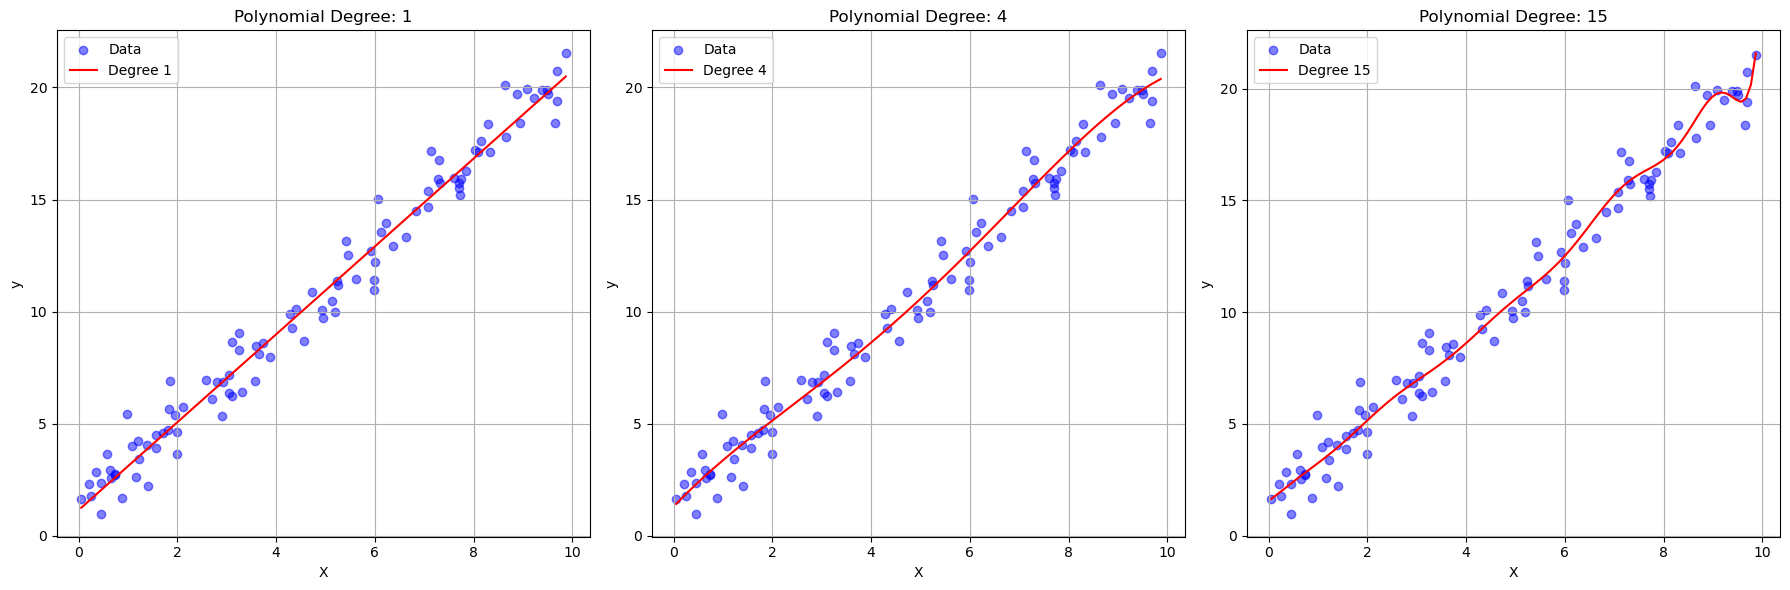

In [6]:
# Function to visualize predictions for different polynomial degrees
def visualize_predictions(degrees):
    plt.figure(figsize=(18, 6))

    for i, degree in enumerate(degrees):
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_train, y_train)

        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_range_pred = model.predict(X_range)

        plt.subplot(1, len(degrees), i + 1)
        plt.scatter(X, y, color="blue", alpha=0.5, label="Data")
        plt.plot(X_range, y_range_pred, color="red", label=f"Degree {degree}")
        plt.title(f"Polynomial Degree: {degree}")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize predictions for polynomial degrees 1, 4, and 15
visualize_predictions(degrees=[1, 4, 15])


## Visualizing Predictions for Underfitting, Good Fit, and Overfitting

### Purpose of the Script

This script visualizes how models of varying complexity (polynomial degrees) fit a dataset. It illustrates:
1. **Underfitting**: When the model is too simple.
2. **Good Fit**: When the model captures the underlying pattern without overcomplicating.
3. **Overfitting**: When the model is overly complex and fits the noise in the data.

### Key Steps in the Script

1. **Model Training**:
   - Polynomial regression models are trained for specified degrees (e.g., 1, 4, 15).

2. **Prediction Generation**:
   - Models predict \( y \) values for a range of \( x \) values to create smooth curves.

3. **Visualization**:
   - Each subplot represents a model of a specific polynomial degree.
   - Data points are plotted alongside the model’s prediction curve.

### Expected Results

1. **Underfitting (Degree 1)**:
   - The model fails to capture the non-linear patterns in the data. The prediction curve is a straight line that oversimplifies the relationship.

2. **Good Fit (Degree 4)**:
   - The model captures the underlying pattern of the data. The prediction curve closely matches the true data distribution without overcomplicating.

3. **Overfitting (Degree 15)**:
   - The model is overly complex, fitting the noise in the data. The prediction curve fluctuates excessively, deviating from the true pattern.

---

### Plot Interpretation

- **X-Axis**: Input feature $ x $.
- **Y-Axis**: Target variable $ y $.
- **Scatter Points**: Represent the actual data points.
- **Prediction Curve**:
  - Red line showing the model’s predictions for a given degree.

### Purpose of Visualization

1. **Diagnosing Model Complexity**:
   - Identify whether the model is underfitting, well-fitted, or overfitting.

2. **Demonstrating the Effect of Polynomial Degree**:
   - Illustrates how increasing model complexity impacts the fit.

3. **Guiding Model Selection**:
   - Helps choose an appropriate polynomial degree for balancing bias and variance.

These visualizations make it intuitive to understand the trade-offs between underfitting and overfitting.


## 3. Regularization: L1 (Lasso) and L2 (Ridge)

Regularization mitigates overfitting by adding a penalty for large coefficients in the model.

### 3.1 L1 Regularization (Lasso)
- Penalizes the sum of absolute values of coefficients.
- Can shrink some coefficients to zero, leading to feature selection.

### 3.2 L2 Regularization (Ridge)
- Penalizes the sum of squared coefficients.
- Reduces the magnitude of all coefficients but does not set any to zero.

### Implementation: Regularization with Boston Housing Dataset
We will implement Ridge and Lasso regression to predict housing prices.


In [7]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Load the dataset
data = fetch_openml(name="boston", as_frame=True)
X = data.data
y = data.target

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge and Lasso regression
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y_test, ridge_pred))}")
print(f"Lasso RMSE: {np.sqrt(mean_squared_error(y_test, lasso_pred))}")


Ridge RMSE: 4.930811680696355
Lasso RMSE: 5.2514466365121475


C:\Users\BRC\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\BRC\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Regularization: Ridge and Lasso Regression

### Purpose of the Script

This script demonstrates the use of **regularization** techniques, Ridge and Lasso regression, to improve the generalization of a linear model by adding penalties to large coefficients. 

### Key Steps in the Script

1. **Load the Dataset**:
   - The Boston Housing dataset is loaded. It contains features like crime rate, number of rooms, and others to predict median housing prices.

2. **Data Preprocessing**:
   - Data is split into training and testing sets.
   - Features are standardized using `StandardScaler` to ensure all variables are on the same scale, which is important for Ridge and Lasso.

3. **Model Training**:
   - **Ridge Regression**: Applies L2 regularization (penalizes squared coefficients).
   - **Lasso Regression**: Applies L1 regularization (penalizes absolute coefficients).

4. **Prediction and Evaluation**:
   - Both models predict the test set.
   - Root Mean Squared Error (RMSE) is calculated to evaluate model performance.

---

### Expected Results

1. **Ridge Regression**:
   - Generally performs well when all features contribute to the prediction.
   - Coefficients are shrunk, but none are set to zero.

2. **Lasso Regression**:
   - Can perform feature selection by setting some coefficients to zero.
   - Useful when only a subset of features is important.

The RMSE values for both models should be similar but may differ depending on the dataset and regularization strength ($\alpha$).

---

### Regularization Overview

- **Ridge (L2)**:
  - Penalizes the sum of squared coefficients:
    $$
    \text{Penalty}_{\text{Ridge}} = \alpha \sum_{i=1}^n \beta_i^2
    $$
  - Shrinks coefficients but retains all features.

- **Lasso (L1)**:
  - Penalizes the sum of absolute coefficients:
    $$
    \text{Penalty}_{\text{Lasso}} = \alpha \sum_{i=1}^n |\beta_i|
    $$
  - Shrinks some coefficients to zero, effectively selecting features.

### Why Use Regularization?

1. **Mitigates Overfitting**:
   - Reduces model complexity by controlling large coefficients.

2. **Improves Generalization**:
   - Balances the trade-off between bias and variance.

3. **Feature Selection (Lasso)**:
   - Identifies the most important features, simplifying the model.

---

### Key Observations

- **Ridge RMSE**: Indicates how well Ridge handles all features and prevents overfitting.
- **Lasso RMSE**: Reflects how Lasso selects a subset of features and regularizes the model.
- Results will vary with the choice of $\alpha$. Larger $\alpha$ increases regularization strength.

### Note on Hyperparameters

- **Alpha ($\alpha$)**:
  - Controls the strength of regularization.
  - Experiment with different $\alpha$ values to understand its impact on Ridge and Lasso performance.
- **Smaller $\alpha$**:
  - Results in weaker regularization and models closer to standard linear regression.
- **Larger $\alpha$**:
  - Increases regularization strength, shrinking coefficients more aggressively.


## 4. Hyperparameter Tuning

Tuning hyperparameters helps optimize model performance.

### 4.1 Grid Search
Exhaustively searches over a specified parameter grid.

### 4.2 Random Search
Randomly samples a fixed number of parameter combinations.

---
### Implementation: Hyperparameter Tuning with Ridge Regression
We'll find the optimal `alpha` value for Ridge regression using Grid Search and Random Search.


In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

# Grid Search for Ridge
ridge_params = {'alpha': [0.1, 1.0, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_scaled, y_train)

print("Best Parameters (Ridge):", ridge_grid.best_params_)
print("Best Score (Ridge):", np.sqrt(-ridge_grid.best_score_))

# Random Search for Ridge
ridge_dist = {'alpha': uniform(0.1, 100)}
ridge_random = RandomizedSearchCV(Ridge(), ridge_dist, scoring='neg_mean_squared_error', n_iter=50, random_state=42, cv=5)
ridge_random.fit(X_train_scaled, y_train)

print("Best Parameters (Ridge - Random Search):", ridge_random.best_params_)
print("Best Score (Ridge - Random Search):", np.sqrt(-ridge_random.best_score_))


Best Parameters (Ridge): {'alpha': 1.0}
Best Score (Ridge): 4.862998517687172
Best Parameters (Ridge - Random Search): {'alpha': 2.1584494295802448}
Best Score (Ridge - Random Search): 4.862730320299498


## Hyperparameter Tuning: Grid Search and Randomized Search for Ridge Regression

### Purpose of the Script

This script demonstrates two common techniques for hyperparameter tuning:
1. **Grid Search**: Exhaustively searches over a specified set of hyperparameter values.
2. **Randomized Search**: Samples a fixed number of hyperparameter combinations from specified distributions.

We use these methods to find the optimal value of the regularization strength parameter, $\alpha$, in Ridge regression.

---

### Key Steps in the Script

1. **Grid Search**:
   - Searches over a predefined set of $\alpha$ values: [0.1, 1.0, 10, 100].
   - Evaluates each $\alpha$ using 5-fold cross-validation.
   - Selects the $\alpha$ value that minimizes the negative mean squared error (MSE).

2. **Randomized Search**:
   - Samples 50 values of $\alpha$ from a uniform distribution between 0.1 and 100.
   - Evaluates each sampled $\alpha$ using 5-fold cross-validation.
   - Selects the $\alpha$ value that minimizes the negative MSE.

3. **Evaluation Metric**:
   - Negative mean squared error (MSE) is used as the scoring metric. The negative sign ensures higher scores represent better performance during the search.

4. **Output**:
   - Optimal $\alpha$ values and corresponding scores for both Grid Search and Randomized Search.

---

### Mathematical Representation

The Ridge regression objective function is:
$$
\text{Objective} = \text{MSE} + \alpha \sum_{i=1}^n \beta_i^2
$$

Where:
- $\text{MSE}$ is the mean squared error.
- $\alpha$ is the regularization strength.
- $\beta_i$ are the model coefficients.

### Comparison of Methods

1. **Grid Search**:
   - Pros:
     - Exhaustive and guarantees finding the best parameter within the specified grid.
   - Cons:
     - Computationally expensive, especially for large parameter grids.

2. **Randomized Search**:
   - Pros:
     - More efficient than Grid Search for large parameter spaces.
     - Can discover optimal or near-optimal parameters without evaluating all possibilities.
   - Cons:
     - Does not guarantee the best parameter but often finds a competitive solution.

---

### Expected Results

1. **Grid Search**:
   - Outputs the best $\alpha$ value from the predefined grid.
   - Provides the corresponding RMSE for the selected $\alpha$.

2. **Randomized Search**:
   - Outputs the best $\alpha$ value from the sampled parameter space.
   - Provides the corresponding RMSE for the selected $\alpha$.

---

### Observations and Insights

1. **Optimal $\alpha$**:
   - Larger $\alpha$ values impose stronger regularization, which can reduce overfitting but may lead to underfitting.
   - Smaller $\alpha$ values allow the model to fit the data more closely but risk overfitting.

2. **Evaluation**:
   - Comparing the RMSE values helps assess which method (Grid or Randomized Search) is more effective for this task.

3. **Efficiency**:
   - Randomized Search may explore a broader parameter space in less time compared to Grid Search.

By using these methods, we can determine the ideal regularization strength for Ridge regression, balancing bias and variance for optimal performance.


## 5. Evaluation Metrics and Model Validation

### Key Metrics:
1. **Mean Squared Error (MSE):** Measures average squared difference between predictions and actual values.
2. **Root Mean Squared Error (RMSE):** Square root of MSE; interpretable in the same units as the target variable.

### Cross-Validation
- Splits the dataset into training and validation sets multiple times for a robust evaluation.
- We'll use k-fold cross-validation to validate our model.


In [9]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
ridge_cv_scores = cross_val_score(Ridge(alpha=1.0), X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)
lasso_cv_scores = cross_val_score(Lasso(alpha=1.0), X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)

print("Ridge CV RMSE:", np.sqrt(-ridge_cv_scores.mean()))
print("Lasso CV RMSE:", np.sqrt(-lasso_cv_scores.mean()))


Ridge CV RMSE: 4.909095358258839
Lasso CV RMSE: 5.459897911741874


## K-Fold Cross-Validation: Evaluating Ridge and Lasso Regression

### Purpose of the Script

This script evaluates the performance of Ridge and Lasso regression models using **k-fold cross-validation**. Cross-validation ensures robust evaluation by testing the model on multiple data splits.

---

### Key Steps in the Script

1. **K-Fold Cross-Validation**:
   - Divides the training data into 10 subsets (folds).
   - Trains the model on 9 folds and evaluates it on the remaining fold.
   - Repeats the process for all folds and calculates the average score.

2. **Evaluation Metric**:
   - Negative Mean Squared Error (MSE) is used as the scoring metric during cross-validation.
   - Root Mean Squared Error (RMSE) is calculated from the negative MSE for interpretability.

3. **Output**:
   - RMSE for Ridge and Lasso regression models, averaged across the 10 folds.

---

### Mathematical Representation

1. **Mean Squared Error (MSE)**:
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
   $$

2. **Root Mean Squared Error (RMSE)**:
   $$
   \text{RMSE} = \sqrt{\text{MSE}}
   $$

3. **Cross-Validation**:
   - For a model \( f \), the cross-validation error is:
     $$
     \text{CV Error} = \frac{1}{k} \sum_{i=1}^k \text{MSE}_i
     $$
   - Where \( k \) is the number of folds.

---

### Expected Results

1. **Ridge Regression**:
   - Outputs the average RMSE across 10 folds.
   - Expected to handle all features effectively due to L2 regularization.

2. **Lasso Regression**:
   - Outputs the average RMSE across 10 folds.
   - Expected to perform feature selection and regularization using L1 penalties.

---

### Benefits of Cross-Validation

1. **Robust Model Evaluation**:
   - Provides a more reliable estimate of model performance by reducing variance due to train-test splits.

2. **Prevents Overfitting**:
   - Evaluates how well the model generalizes to unseen data.

3. **Comparison of Models**:
   - Helps compare Ridge and Lasso regression performance under similar conditions.

---

### Observations and Insights

1. **Comparison of RMSE**:
   - Lower RMSE indicates better performance.
   - Differences between Ridge and Lasso RMSE can provide insights into the importance of regularization and feature selection for the dataset.

2. **Model Selection**:
   - Choose the model with the lower RMSE for better generalization.

By incorporating cross-validation, the evaluation becomes more reliable, enabling better decisions about the suitability of Ridge or Lasso regression for the task.


## 6. Visualization of Regularization Effects

We'll compare the coefficients of Ridge and Lasso regression to understand how they affect model complexity.


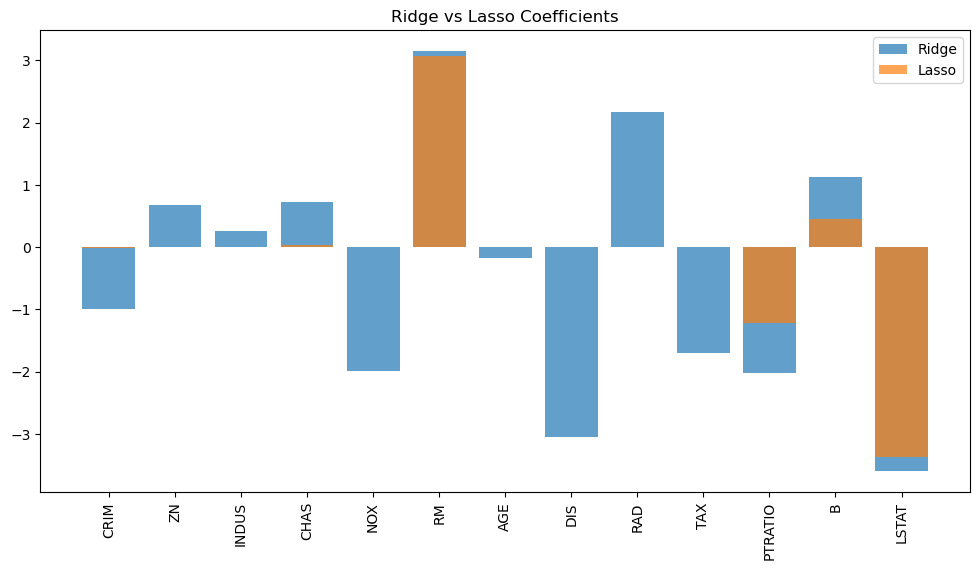

In [10]:
# Visualize Ridge vs Lasso Coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), ridge.coef_, alpha=0.7, label="Ridge")
plt.bar(range(X.shape[1]), lasso.coef_, alpha=0.7, label="Lasso")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title("Ridge vs Lasso Coefficients")
plt.legend()
plt.show()


## Visualizing Coefficients: Ridge vs. Lasso Regression

### Purpose of the Visualization

This visualization compares the coefficients of Ridge and Lasso regression models. It highlights how each method handles regularization and the impact on feature importance.

---

### Key Steps in the Script

1. **Model Coefficients**:
   - Retrieve the coefficients (`ridge.coef_` and `lasso.coef_`) from the trained Ridge and Lasso models.

2. **Bar Plot**:
   - Use a bar plot to compare the magnitude of coefficients for each feature.
   - X-axis represents feature names.
   - Y-axis represents the magnitude of the coefficients.

3. **Feature Names**:
   - Use `X.columns` from the dataset to label the coefficients corresponding to each feature.

4. **Comparison**:
   - Ridge: Coefficients are shrunk but not set to zero.
   - Lasso: Some coefficients are shrunk to zero, effectively performing feature selection.

---

### Expected Results

1. **Ridge Regression**:
   - Retains all features by shrinking coefficients uniformly.
   - Suitable for datasets where all features contribute to the prediction.

2. **Lasso Regression**:
   - Shrinks some coefficients to zero, removing irrelevant features.
   - Suitable for datasets with many irrelevant or redundant features.

---

### Interpretation of the Plot

1. **X-Axis**:
   - Feature names from the dataset.

2. **Y-Axis**:
   - Magnitude of the coefficients. Larger magnitudes indicate greater feature importance.

3. **Bars**:
   - **Ridge (Blue)**: Shows the effect of L2 regularization, shrinking all coefficients.
   - **Lasso (Orange)**: Highlights the effect of L1 regularization, shrinking some coefficients to zero.

4. **Feature Importance**:
   - Features with larger coefficients are more important for the prediction.
   - Features with zero coefficients (Lasso) are considered irrelevant.

---

### Key Insights

1. **Effect of Regularization**:
   - Ridge retains all features but reduces their impact.
   - Lasso selects a subset of features, making the model sparser.

2. **Feature Selection (Lasso)**:
   - Helps simplify models and improve interpretability.
   - Reduces the risk of overfitting by removing irrelevant features.

3. **Trade-Offs**:
   - Ridge is preferred when all features are informative but may be prone to multicollinearity.
   - Lasso is ideal for datasets with many irrelevant or redundant features.

---

### Example Use Cases

- **Ridge Regression**:
  - Predicting outcomes where all features have some contribution (e.g., economic forecasting).
  
- **Lasso Regression**:
  - Simplifying models with many features (e.g., genetic data analysis).

This visualization provides a clear and intuitive way to compare the impact of Ridge and Lasso regularization on feature importance.


## 7. Conclusion

In this notebook, we covered:
1. Overfitting and underfitting using polynomial regression.
2. Regularization techniques (L1 and L2).
3. Hyperparameter tuning using Grid Search and Random Search.
4. Evaluation metrics and cross-validation for robust model evaluation.
5. Visualization of regularization effects on model coefficients.
